# 14 TEXTURES

현재 구현된 RESTERIZER를 이용해 큐브나 구와 같은 오브젝트를 구현할 수 있다. 
하지만 우리는 보통 단순한 기하학적인 물체를 만들지 않는다. 보통 실제 물체를 렌더링을 하고자 한다.
예를 들어 주사위, 박스와 같은 물체.

## 상자 그리기
scene에 나무상자를 그리기 위해서 한 가지 옵션을 생각해보면 나무결, 못, 머리 등을 복제하기 위해 많은 삼각형을 추가하는 것이 한 가지의 방법이다. \
다른 한 가지 옵션을 생각해보면 세부사항을 가짜로 만들어 개체의 형상을 수정하는 대신 그 위에 나무 처럼 보이는 것을 페인트하는 것이 하나의 방법이라고 할 수 있겠다. \
두 번째 방법은 첫 번째 방법보다 훨씬 기하학적 계산량이 적을 것이다. 

1. 우선 삼각형에 그림을 그릴 이미지가 필요하다. 
2. 다음으로 텍스쳐 이미지의 질감이 모델에 어떻게 적용되는지 명시해야한다. 즉 삼각형의 각 꼭지점에 어떤 텍스쳐 포인트가 들어 가야하는지를 지정함으로써 삼각형 단위로 매핑을 정의할 수 있게 된다.


매핑을 위해서는 새로운 텍스쳐 좌표계를 하나 만들어야 한다. \
기존의 $x, y$ 좌표계는 켄버스에서 사용하고 있으므로 새로운 $ (u, v) $ 좌표계를 사용한다.

$(u, v)$ 좌표계는 텍스쳐의 왼쪽 상단을 오리진으로 한다. 또한 $u, v$는 실수 집합에 속하며 범위는 [0, 1]로 고정한다. 이렇게 된다면 텍스쳐의 해상도를 수정하지 않아도 비율에 맞도록 수정할 수 있기 때문이다. \
즉 $u, v$에 텍스쳐의 너비와 높이의 곱을 통해 텍스쳐의 픽셀(이하 texel)의 좌표를 얻을 수 있다.


기본적인 텍스쳐 매핑의 아이디어는 간단하다. 우선 $(u, v)$ 좌표계를 각 삼각형의 픽셀에 대해 계산한다. 다음 적절한 texel을 텍스쳐로부터 갖고온다. 그리고 픽셀을 알맞게 색칠한다.

속성 매핑을 사용하여 삼각형의 면 전체에 걸쳐 u와 v의 값을 보간하여 각 픽셀에 (u,v)를 제공할 수 있다. 이를 통해 (tx,ty), 텍셀을 가져오고 음영을 적용하고 픽셀을 결과 색으로 칠할 수 있다.

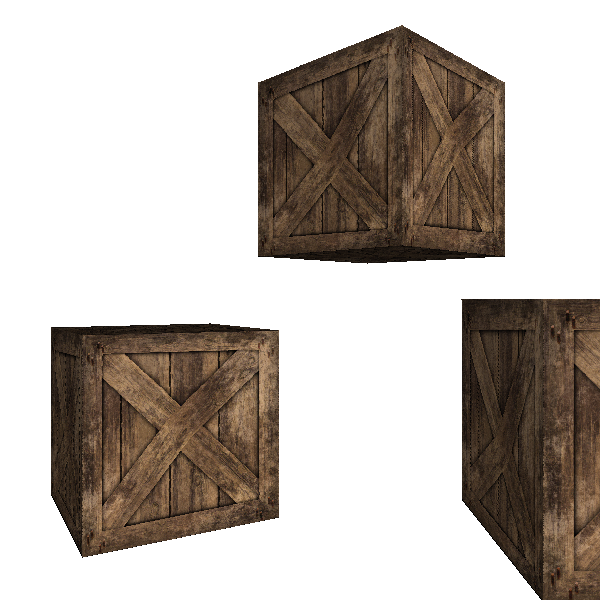

위와 같은 결과물이 나오게 된다. \
얼핏 보면 단순히 잘 나온 것 처럼 보이지만 상자 중앙 부분에 양 꼭짓점을 연결한 나무 부분이 어색한 것을 볼 수 있다.


이는 우리가 사실 u와 v가 화면 전체에 걸쳐 선형적으로 변환된다는 것이라고 단순하게 가정을 하여 이러한 문제가 생겼다고 볼 수 있다. \
이는 잘못된 가정임을 알 수 있다. 


선형적이며 매우 긴 복도를 생각해 보았을 때 멀리 있는 물체들은 보는 방향으로 더 짧게 가까이 있는 물체들은 더 길게 보이게 된다. 

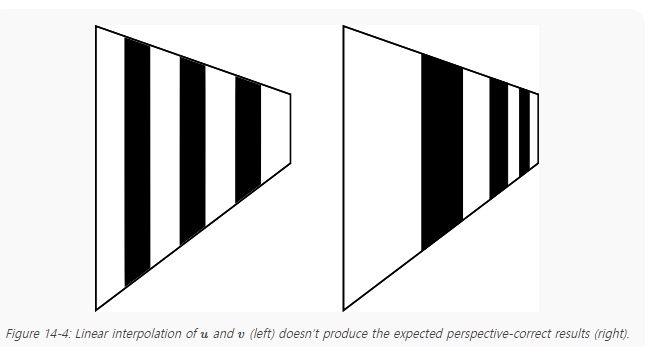

이에 대한 해결방법은 이전 쳅터 12장 Hidden Surface Removal에서 적용한 해답과 매우 비슷하다. $u, v$는 화면 좌표계에서 선형적이지 않지만 $u/z, v/z$는 선형적이다.

consider that u varies linearly in 3D space, and substitute x and y with their screen-space expressions.
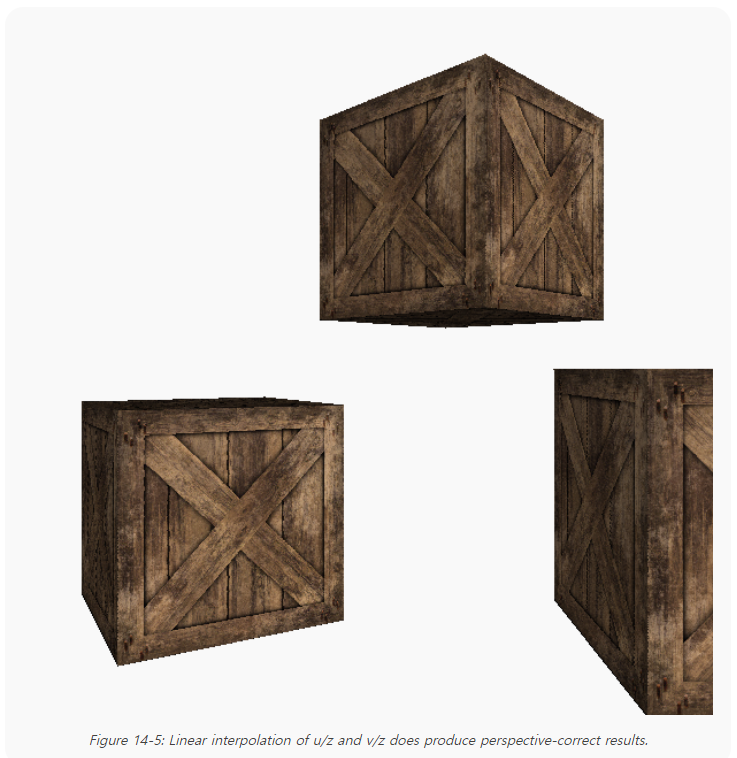